In [4]:
questions = ["show me fintech regulations", "fintech regulations please", "what are the available fintech regulations"]

# Google's Universal Sentence Encoder

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

In [9]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    embeddings = session.run(use(questions))

In [8]:
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt

In [35]:
# vector mapping of three given questions

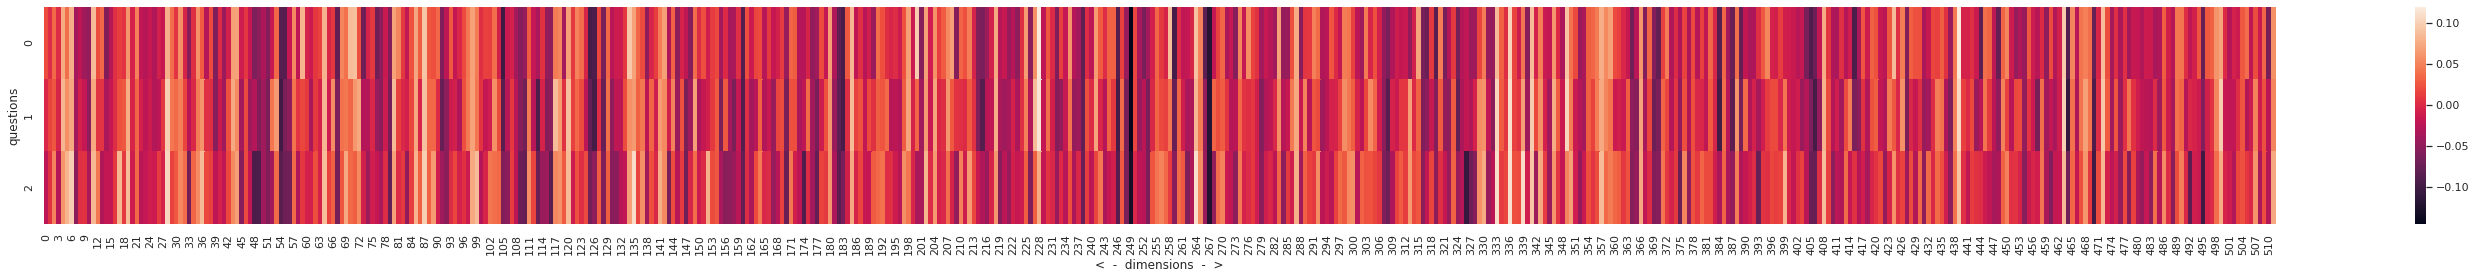

In [67]:
plt.figure(figsize=(50, 4))
fig = sb.heatmap(embeddings)
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

In [82]:
vector_mean = np.mean(embeddings, axis=0).reshape(1, -1)

In [83]:
vectors_with_mean = np.concatenate((embeddings, embed_mean), axis=0)

In [36]:
# base vectors with mean vector

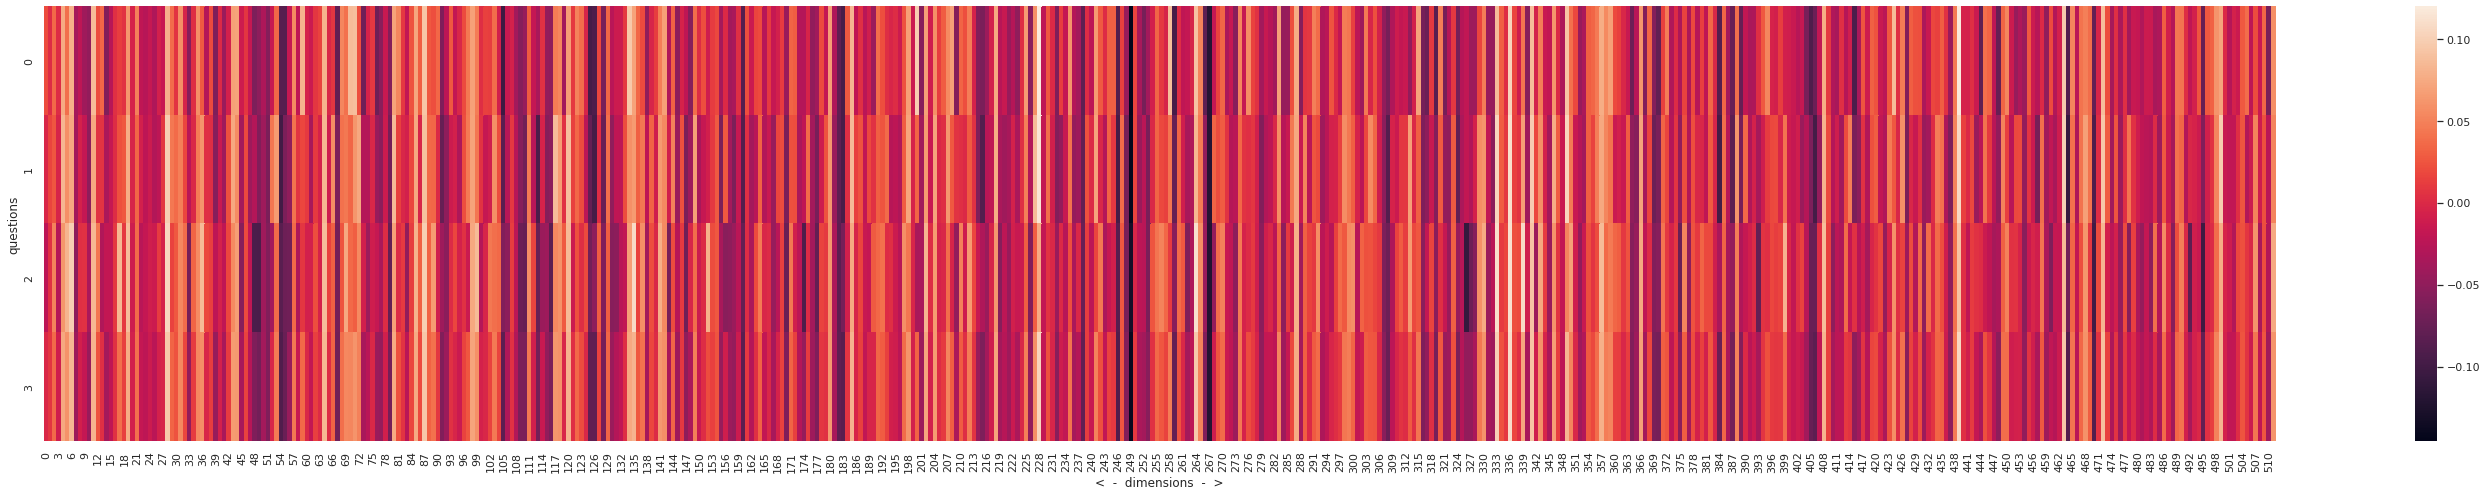

In [85]:
plt.figure(figsize=(50, 8))
fig = sb.heatmap(vectors_with_mean)
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

# FastText

In [149]:
import fasttext as ft

# Loading model for Finnish.
model = ft.load_model('wiki-news-300d-1M-subword.bin')

# Getting word vectors for 'one' and 'two'.
one = model.get_word_vector('yksi')

In [10]:
ft_vectors = []

In [11]:
for ques in questions:
    ft_vectors.append(model.get_sentence_vector(ques))

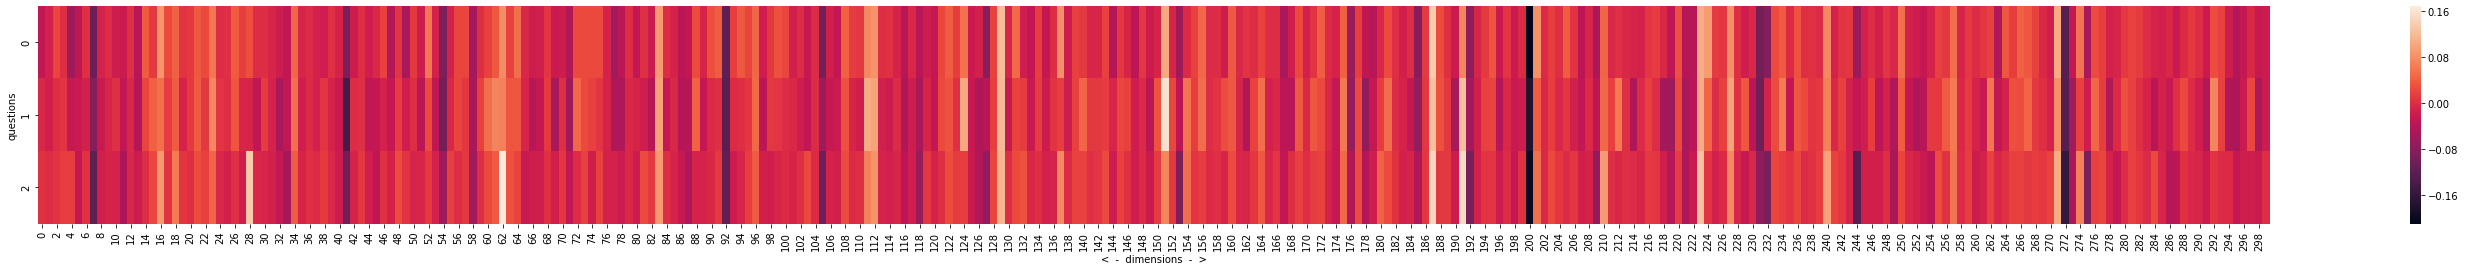

In [16]:
plt.figure(figsize=(50, 4))
fig = sb.heatmap(np.array(ft_vectors))
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

In [22]:
ft_mean = np.mean(np.array(ft_vectors), axis=0).reshape(1, -1)

In [23]:
ft_vectors_with_mean = np.concatenate((np.array(ft_vectors), ft_mean), axis=0)

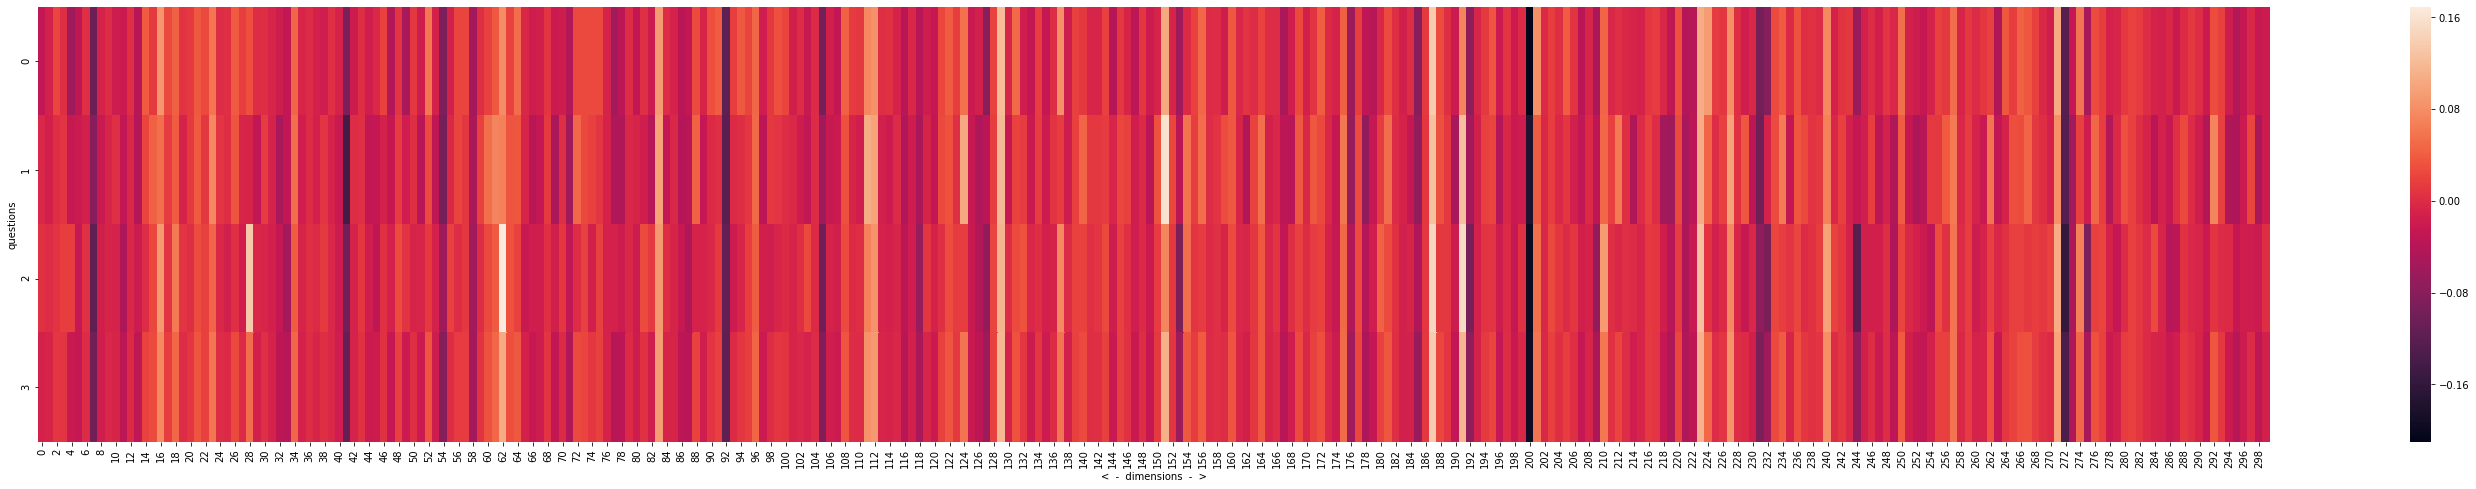

In [24]:
plt.figure(figsize=(50, 8))
fig = sb.heatmap(ft_vectors_with_mean)
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

# BERT

In [39]:
from bert_serving.client import BertClient
bc = BertClient()

In [40]:
bert_vectors = bc.encode(questions)

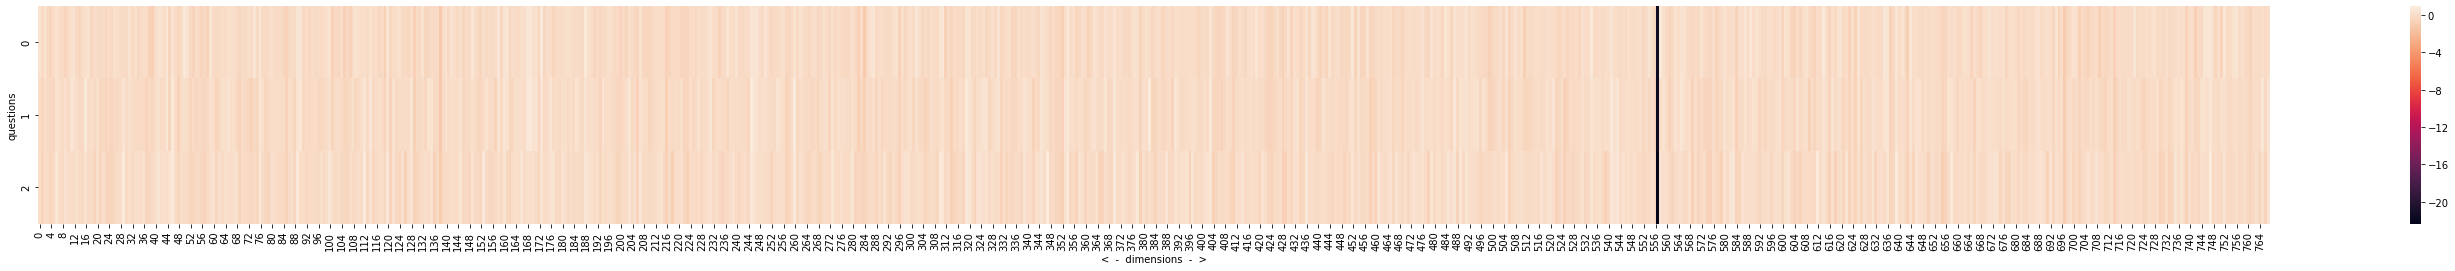

In [41]:
plt.figure(figsize=(50, 4))
fig = sb.heatmap(bert_vectors)
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

In [42]:
bert_mean = np.mean(bert_vectors, axis=0).reshape(1, -1)

In [43]:
bert_vectors_with_mean = np.concatenate((bert_vectors, bert_mean), axis=0)

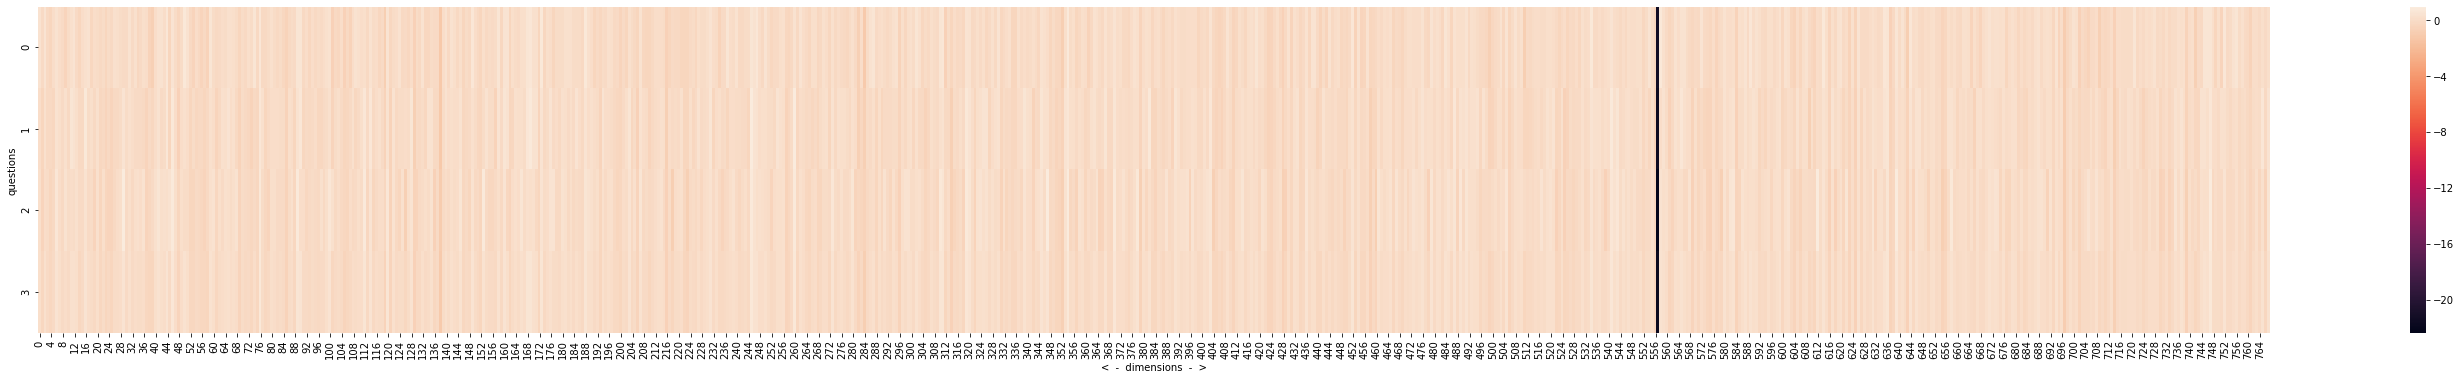

In [44]:
plt.figure(figsize=(50, 6))
fig = sb.heatmap(bert_vectors_with_mean)
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

# FinBERT

In [2]:
from finbert_embedding.embedding import FinbertEmbedding
finbert = FinbertEmbedding()

In [21]:
f_bert = []

for ques in questions:
    f_bert_tensor = finbert.sentence_vector(ques)
    f_bert_nd = f_bert_tensor.cpu().detach().numpy()
    f_bert.append(f_bert_nd)

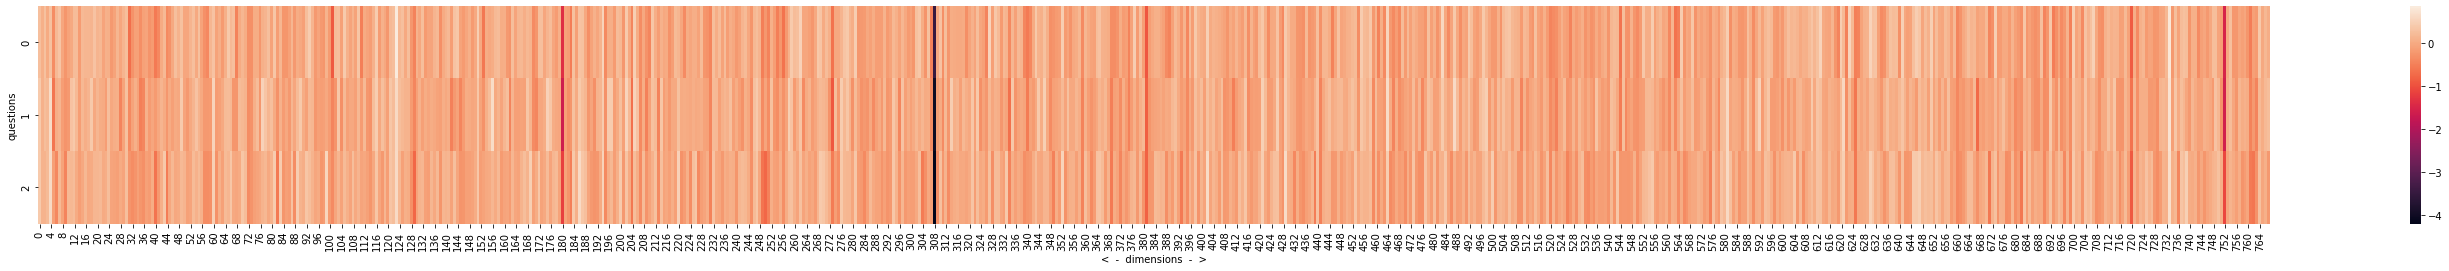

In [22]:
plt.figure(figsize=(50, 4))
fig = sb.heatmap(f_bert)
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

In [31]:
f_bert_mean = np.mean(np.array(f_bert), axis=0).reshape(1, -1)

In [88]:
f_bert_vectors_with_mean = np.concatenate((np.array(f_bert), f_bert_mean), axis=0)

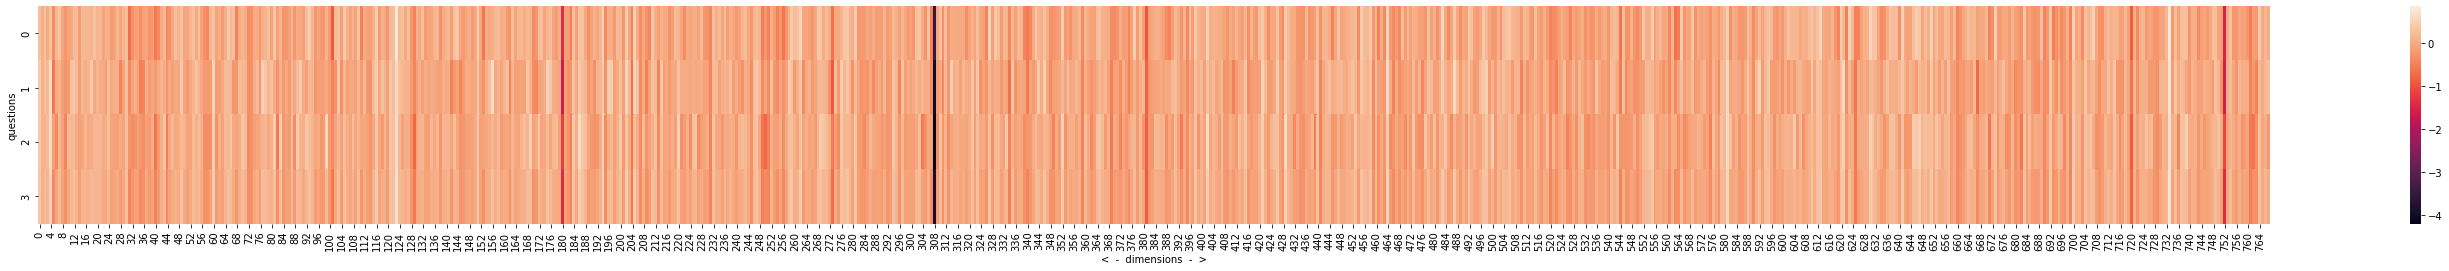

In [90]:
plt.figure(figsize=(50, 4))
fig = sb.heatmap(f_bert_vectors_with_mean)
fig.set(xlabel = "<  -  dimensions  -  >", ylabel="questions")
plt.show()

In [91]:
# vector averaging reference -> https://arxiv.org/pdf/1805.09843.pdf

In [6]:
from sklearn.manifold import TSNE

In [147]:
corpus = [

# category 1
"any links for regulations",
"regulation links please",
"please give any links for fintech regulations",
"give me links towards fintech regulations",
"online links for fintech",
"links to startup regulations",
"fintech regulation links",
"can you give me links to regulations",
"Provide regulatory document links",
"Any regulation references",
"References to regulations",
"Reference link to startup regulations please",
"Regulation website",
"Where is regulation website",
"Website address for startup regulations",
"Download regulations document",
"Get regulations document",
"Download startup regulations document",
"Get regulations document for fintech startups",
"Show fintech regulations URLs",
"List fintech regulations links",
"Take me to regulations website",
"What are the regulations to fintechs",
"Show me links to fintech regulations",
"Rules for fintechs",
"Are there any restrictions for fintechs",
"Any directives to fintechs",
"Fintech laws and regulations",
"Fintech rules and regulations",
        
# category 2        
"How many fintech companies and financial institutions are currently working in your market Please list below",
"Show me the company status",
"Show how many companies are working in your market",
"Show market status for companies",
"How many companies are there",
"Can you show the number of companies",
"Company count",
"Number of companies under your market",
"Count of companies currently in market",
"How many companies",
"How many companies are now running",
"Show count of running companies",
"Running companies details please",
"Show number of companies working",
"How many working companies in your market have",


# category 3
"Can you give a general overview of the fintech ecosystem in your country",
"Fintech ecosystem",
"Overview of fintech ecosystem",
"Give me an overview of your ecosystem",
"Ecosystem overview",
"Details of your ecosystem",
"What’s your startup ecosystem",
"How your startup ecosystem work",
"Details on your startup ecosystem",
"Overview of your country startup ecosystem",
"Your country ecosystem for startups",
"Startup Ecosystem"

]

In [3]:
import pandas as pd
f_bert_huge = []
df = pd.read_pickle('corpus.pickle')

T-SNE on FinBERT

In [133]:
for ques in df['x']:
    f_bert_tensor = finbert.sentence_vector(ques.lower())
    f_bert_nd = f_bert_tensor.cpu().detach().numpy()
    f_bert_huge.append(f_bert_nd)


In [139]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000)
tsne_results = tsne.fit_transform(np.array(f_bert_huge))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 56 samples in 0.001s...
[t-SNE] Computed neighbors for 56 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Mean sigma: 1.710328
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.026619
[t-SNE] KL divergence after 1000 iterations: 0.375504


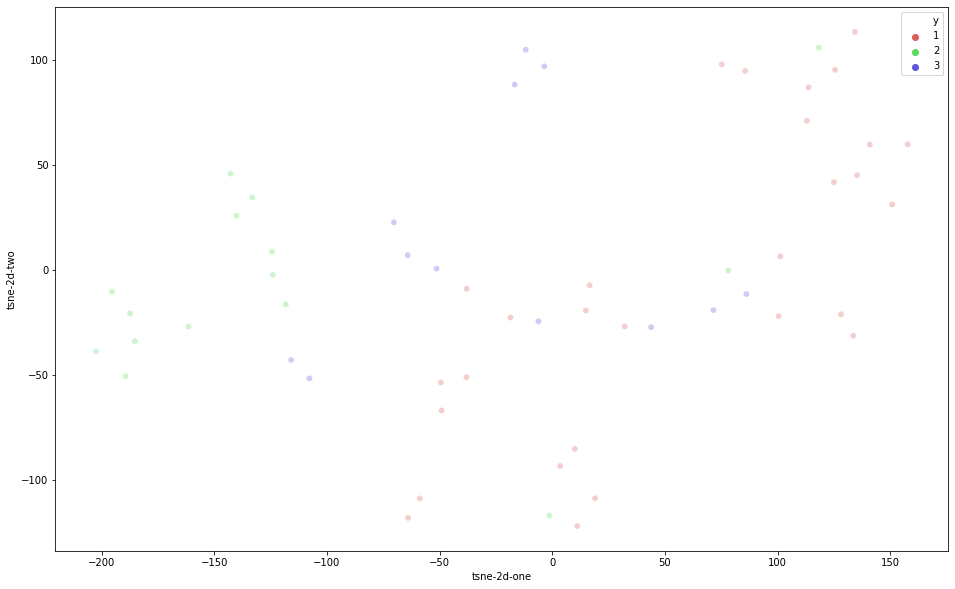

In [140]:

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sb.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sb.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)

T-SNE on BERT

In [143]:
bert_vectors_huge = bc.encode(list(df['x']))

In [144]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000)
tsne_results = tsne.fit_transform(np.array(bert_vectors_huge))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 56 samples in 0.002s...
[t-SNE] Computed neighbors for 56 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Mean sigma: 2.397872
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.695786
[t-SNE] KL divergence after 1950 iterations: 0.445307


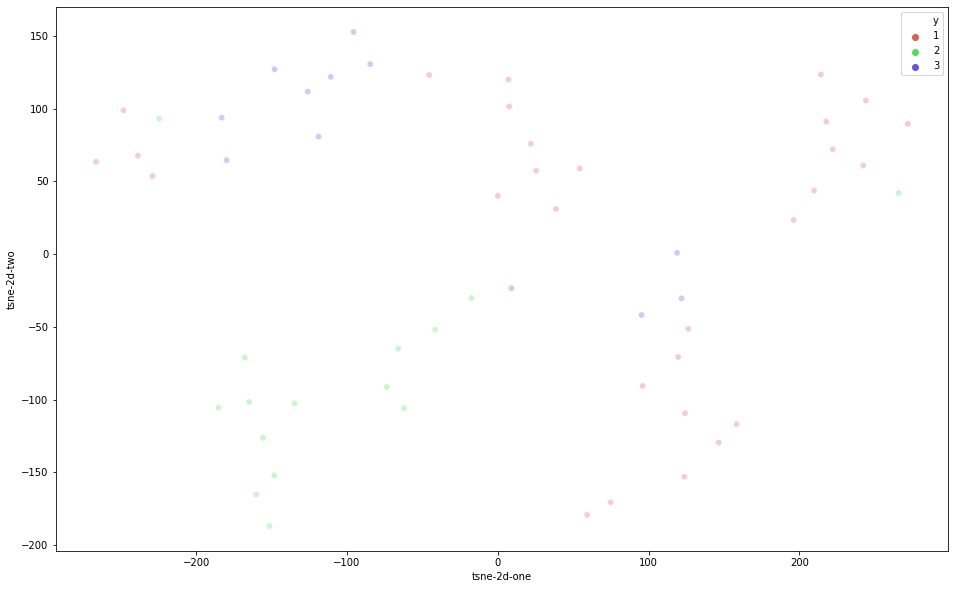

In [146]:

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sb.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sb.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)

T - SNE on FastText

In [150]:
ft_vectors_huge = []

for ques in df['x']:
    ft_vectors_huge.append(model.get_sentence_vector(ques))

In [151]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000)
tsne_results = tsne.fit_transform(np.array(ft_vectors_huge))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 56 samples in 0.044s...
[t-SNE] Computed neighbors for 56 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Mean sigma: 0.129343
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.564468
[t-SNE] KL divergence after 3900 iterations: 0.398516


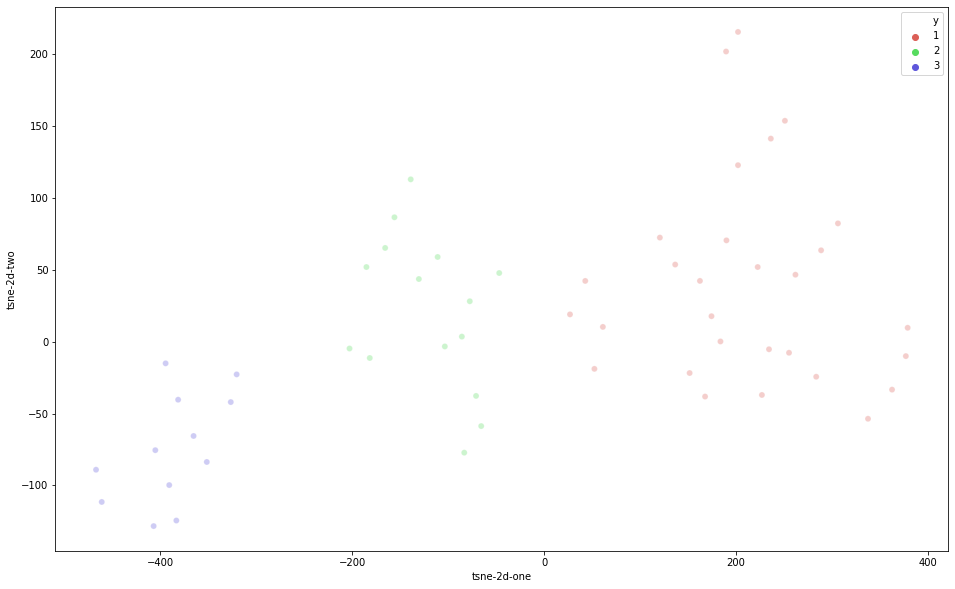

In [152]:

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sb.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sb.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)

T - SNE on G's USE


In [4]:
with tf.Session() as session:
    session.run([tf.global_variables_initializer(), tf.tables_initializer()])
    embedding_huge = session.run(use(df['x']))

In [9]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000)
tsne_results = tsne.fit_transform(np.array(embedding_huge))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 56 samples in 0.008s...
[t-SNE] Computed neighbors for 56 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 56 / 56
[t-SNE] Mean sigma: 0.356543
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.129837
[t-SNE] KL divergence after 1000 iterations: 0.519221


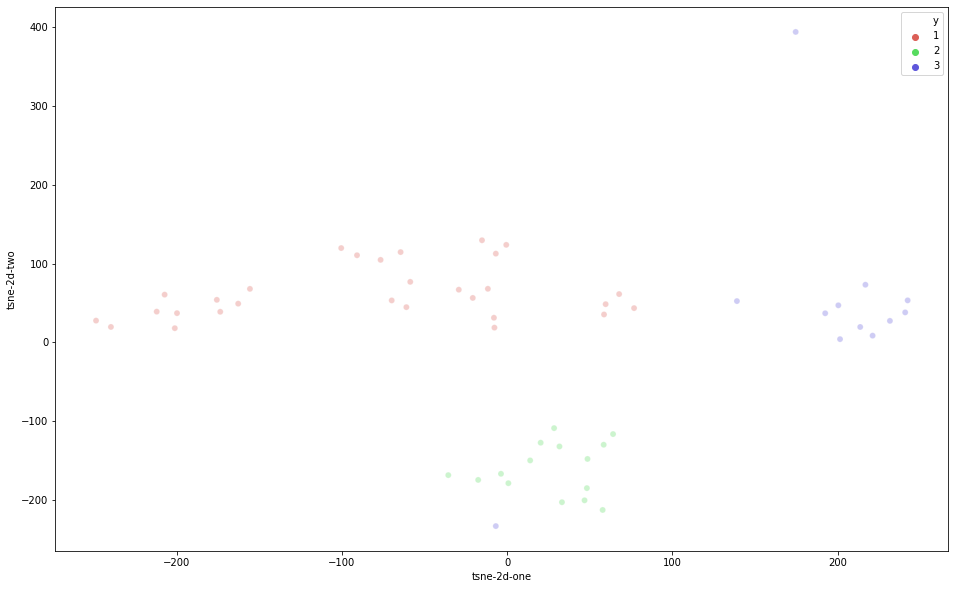

In [10]:

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sb.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='y',
    palette=sb.color_palette("hls", 3),
    data=df,
    legend="full",
    alpha=0.3
)